# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
unique_labels = pd.read_csv('signnames.csv')
n_classes = len(unique_labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

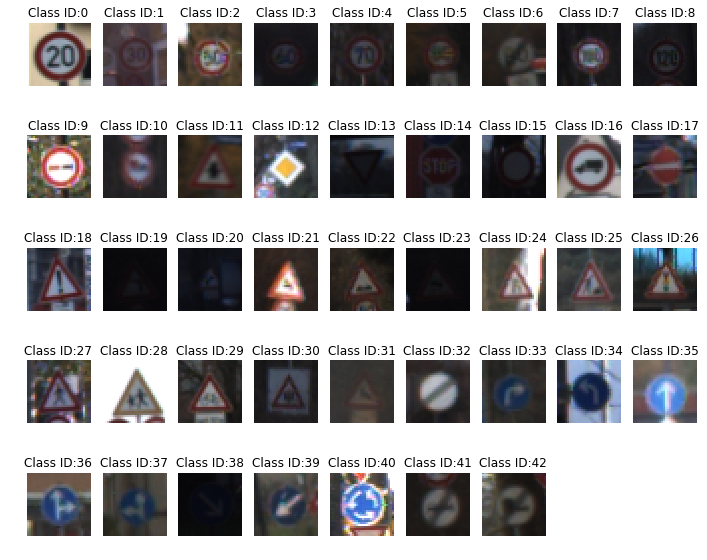

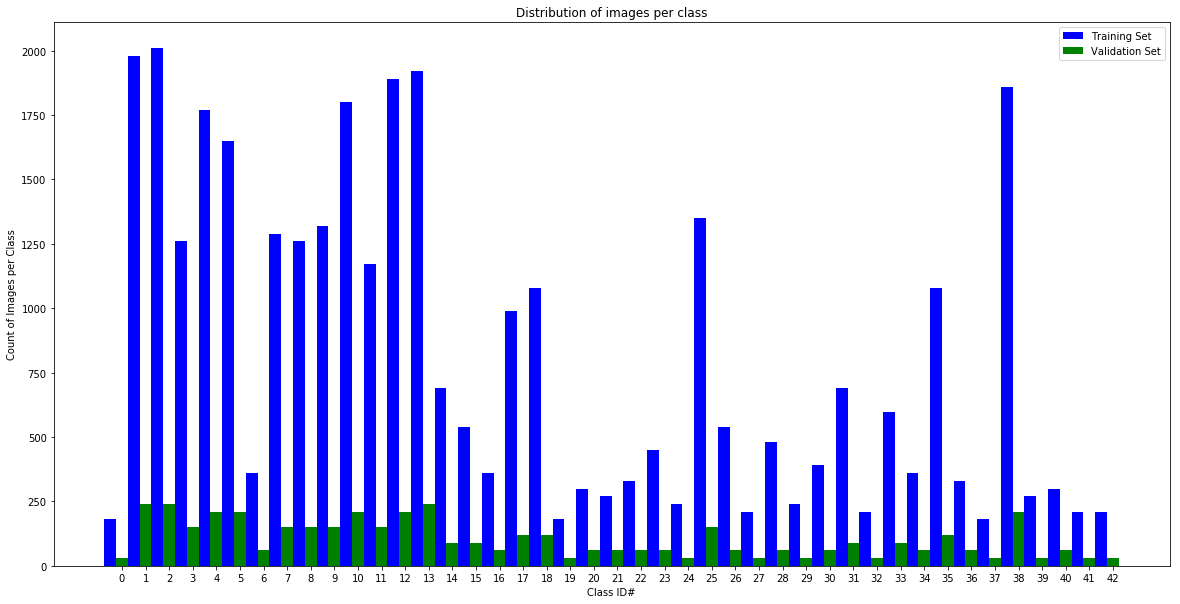

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize the frequency of each class
#plt.figure(1,figsize=(7,7))
#frame1=plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+1))
#print(frame1[0])
#print(frame1[1])

#count = np.bincount(y_train)
#class_num = np.nonzero(count)[0]
#print('ClassNumber')
#print(class_num)
#print('Count')
#print(count)


plt.imshow

# Plot one image from each class
current_class=0
unique_index=[]

for index in range(0,n_classes):
    current_class=index
    # finds the first occurence of each class in the dataset and appends its index
    # to the unique_index array
    unique_index.append((np.where(y_train==current_class))[0][0])


gs1 = gridspec.GridSpec(5, 9)
gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.
plt.figure(figsize=(12,10))
for i in range(43):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')

    img = X_train[unique_index[i]]

    plt.subplot(5,9,i+1)
    plt.title('Class ID:'+ str(y_train[unique_index[i]]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
# Visualizations will be shown in the notebook.
%matplotlib inline

### PRINT DISTRIBUTIONS ALONG WITH FITTING POLYNOMIAL

classes = np.arange(0, n_classes)  # the x locations for the groups
width = 0.50       # the width of the bars

train_counts = np.unique(y_train, return_counts=True)[1]
valid_counts = np.unique(y_valid, return_counts=True)[1]

fig, ax = plt.subplots(figsize=(20,10))
train_rects = ax.bar(classes - width, train_counts, width, color='b')
valid_rects = ax.bar(classes, valid_counts, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count of Images per Class')
ax.set_xlabel('Class ID#')
ax.set_title('Distribution of images per class')
ax.set_xticks(classes)

ax.legend((train_rects, valid_rects), ('Training Set', 'Validation Set'))



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [5]:
#plt.figure(3,figsize=(7,7))
#frame1=plt.hist(y_train_new, bins=np.arange(y_train_new.min(), y_train_new.max()+1))
#print(y_train_new.shape)

# Creating function to normalize the images
def normalize(X):
    mean=np.mean(X)
    stdv=np.std(X)
    normalized_X=(X-mean)/stdv
    return normalized_X

# Storing original data
X_train_Original=X_train
X_valid_Original=X_valid
X_test_Original=X_test


(-0.5, 31.5, 31.5, -0.5)

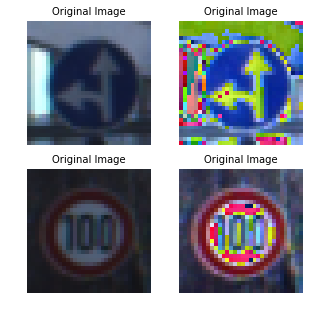

In [6]:
X_train=normalize(X_train_Original)
X_valid=normalize(X_valid_Original)
X_test=normalize(X_test_Original)
X_train=normalize(X_train_Original)



# Showing the change between the original image and the normalized image
plt.figure(1,figsize=(5,5))
plt.subplot(2, 2, 1)
plt.imshow(X_train_Original[5000,:,:,:])    
plt.axis('off')
plt.title("Original Image", fontsize=10)
plt.subplot(2,2,2)
plt.imshow(X_train[5000,:,:,:])
plt.title("Original Image", fontsize=10)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(X_train_Original[24050,:,:,:])    
plt.axis('off')
plt.title("Original Image", fontsize=10)
plt.subplot(2,2,4)
plt.imshow(X_train[24050,:,:,:])
plt.title("Original Image", fontsize=10)
plt.axis('off')

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Step #1: Shuffle training data in order to avoid obtaining
# entire minibatches of highly correlated examples. 

from sklearn.utils import shuffle
X_train,y_train =shuffle(X_train,y_train)

In [8]:
# Step #2: set up basic parameters for ConvNet

import tensorflow as tf

EPOCHS = 50       #change to 40 once testing is done
BATCH_SIZE = 200    #change to 40 once testing is done

In [9]:
# Step #3: implement the LeNet architecture with all the necessary weights and arguments

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # REMEMBER: The weights have the following form (filter_width, filter_height, input_depth, output_depth)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Added a dropout layer
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes=43 (clases).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
# Step 4: Define the tensor flow variables that will hold the input images. The "None" dimension is so that
# this tensorflow variable can take as many input images as we desire. The first dimmension always correspond
# to the number of images in the training, validation and testing sets.

# here on the 4th dimension of the tensor I make sure to capture the three channels of the input image (RGB) as
# well as the input size of the image 32 by 32
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

# Step 5: We want to make sure to one-hot-encode the labels (on the "y" tensorflow variable) for all training, 
# validation and testing sets. Here we are making sure that this happens once the variable is initialized.
# The initialization happens further down in the code
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Defining the training Pipeline

# Step 1: Define a learning rate
rate = 0.0004   #change to 0.0005

# Step 2: calculate the logits using the LeNet function/architecture implemented above
logits = LeNet(x)

# Step 3: Implement the softmax cross entropy function. This measures the probability error in 
# discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# Step 4: we use reduce_mean to calculate the average cross entropy across all elements/dimensions of the tensor.
loss_operation = tf.reduce_mean(cross_entropy)

# Step 5: we initialize our optimizer and set it to minimize the loss function (i.e. reduced average of the cross
# entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
# Evaluating the Model:
# Here I evaluate how well the loss and accuracy of the model are for a given dataset.

# Step #1: First we create a function to compute the correct prediction and accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss/num_examples, total_accuracy / num_examples

train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []

In [13]:
# Training the model

# First start the session
with tf.Session() as sess:
    # then initialize the tensor flow variables/placeholders/operations defined in the
    #previous lines of code
    sess.run(tf.global_variables_initializer())
    
    # then we find the total number of examples in the training set (again). It was 
    # originally defined in a previous code cell as "n_train"
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    # Here we iterate through each epoch. The epoch parameter was previously defined. The training
    # oeration is a time dependent iterative operation. With each EPOCH iteration, the optimizer that
    # was previously defined which minimizes the loss function should bring the model closer to 
    # convergence
    for i in range(EPOCHS):
        
        # Here we re-shuffle the data. Not truly necessary as we did this step before as well
        X_train, y_train = shuffle(X_train, y_train)
        
        # Here we break down the training data into batches based on batch sizes and run
        # the training operation (i.e. function with adamoptimizer that minimizes the loss function
        # which is the average of the (reduced) average of the cross entropy across the entire
        # tensor operation)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            # Finally, we run the training operation on the batch that was just selected
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
        
    

        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        valid_loss_history.append(validation_loss)
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        
        
        # Here we use the evaluation function (defined in a previous cell) to check the total 
        # accuracy of the model achieved during the current EPOCH after completing the training 
        # with all of the batches in the training set.        
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)
        
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        valid_loss_history.append(validation_loss)      
        valid_accuracy_history.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Train Loss = {:.3f}".format(train_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))        
        print()
    
    # Finally we save the model on convergence.
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.430
Train Loss = 2.129
Validation Accuracy = 0.347
Validation Loss = 2.353

EPOCH 2 ...
Train Accuracy = 0.689
Train Loss = 1.024
Validation Accuracy = 0.629
Validation Loss = 1.243

EPOCH 3 ...
Train Accuracy = 0.826
Train Loss = 0.631
Validation Accuracy = 0.763
Validation Loss = 0.858

EPOCH 4 ...
Train Accuracy = 0.901
Train Loss = 0.424
Validation Accuracy = 0.822
Validation Loss = 0.637

EPOCH 5 ...
Train Accuracy = 0.927
Train Loss = 0.319
Validation Accuracy = 0.862
Validation Loss = 0.520

EPOCH 6 ...
Train Accuracy = 0.940
Train Loss = 0.241
Validation Accuracy = 0.860
Validation Loss = 0.472

EPOCH 7 ...
Train Accuracy = 0.950
Train Loss = 0.200
Validation Accuracy = 0.886
Validation Loss = 0.418

EPOCH 8 ...
Train Accuracy = 0.962
Train Loss = 0.162
Validation Accuracy = 0.892
Validation Loss = 0.389

EPOCH 9 ...
Train Accuracy = 0.966
Train Loss = 0.147
Validation Accuracy = 0.908
Validation Loss = 0.362

EPOCH 10 ...
Train Accur

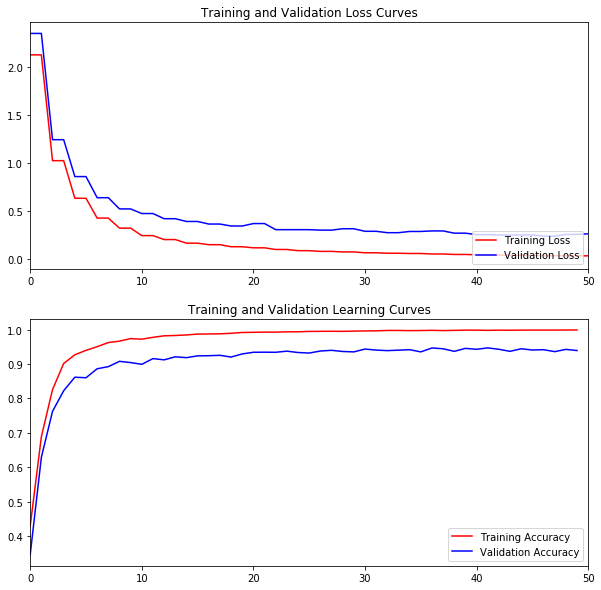

In [14]:
plt.figure(1,figsize=(10,10))
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Training and Validation Loss Curves')
loss_plot.plot(train_loss_history, 'r', label='Training Loss')
loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=4)
loss_plot = plt.subplot(2,1,2)
loss_plot.set_title('Training and Validation Learning Curves')
loss_plot.plot(train_accuracy_history, 'r', label='Training Accuracy')
loss_plot.plot(valid_accuracy_history, 'b', label='Validation Accuracy')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=4)

In [15]:
## Now that the CNN has been trained/validated, we test it on images that were part of the original set but
## that were reserved exclusively for the testing set. Based on the predictions of the CNN we calculate the
## testing loss and accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss,test_accuracy = evaluate(X_test, y_test)

    print("Test Loss = {:.3f}".format(test_loss))    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss = 0.380
Test Accuracy = 0.938


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

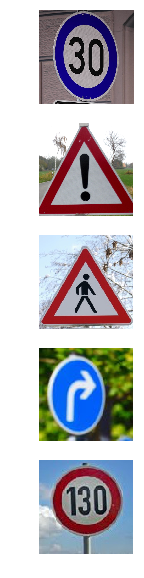

In [18]:
import cv2
import matplotlib.image as mpimg 
plt.figure(1,figsize=(10,10))
unique_labels = pd.read_csv('signnames.csv')
directory = 'web-test-set/'
image_names = ['Class 00.png','Class 18.jpg','Class 27.jpg', 'Class 33.jpg', 'Class Unk.jpg']

test_images = np.zeros((5,32,32,3), dtype=np.uint8)

for i in range(5):
    if i==0:
        image = cv2.imread(directory + image_names[i])
        test_images[i] = cv2.resize(image[:,:,:3], (32, 32))
    else:
        image = mpimg.imread(directory + image_names[i])
        test_images[i] = cv2.resize(image, (32, 32))
    plt.subplot(5, 1, i+1)
    plt.imshow(image)
    plt.axis('off')

test_images = test_images.astype(np.float32)


### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

[32 18 11 34  9]
[1, 18, 27, 33, 'No class']


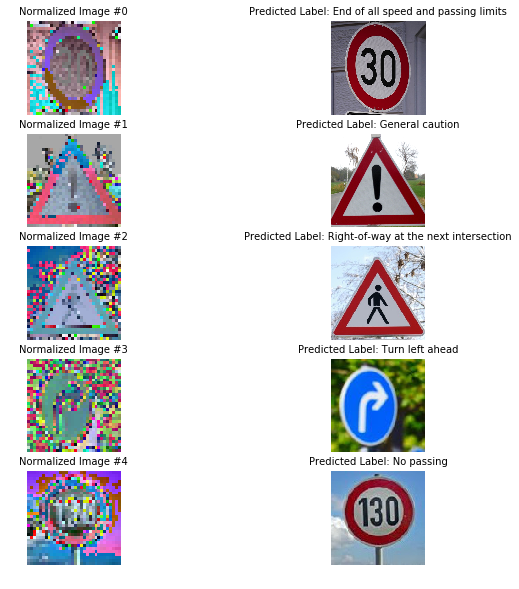

In [21]:
## Normalizing the test images
test_images_normalized=normalize(test_images)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(logits, feed_dict={x:test_images_normalized, keep_prob:1})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    y_true=[1,18,27,33,'No class']
    print(predicted_labels)
    print(y_true)
plt.figure(1,figsize=(10,10))
for i in range(5):
    image = mpimg.imread(directory + image_names[i])
    plt.subplot(5, 2, (i+1)*2-1)
    plt.imshow(test_images_normalized[i,:,:,:])    
    plt.axis('off')
    plt.title("Normalized Image #" + str(i), fontsize=10)
    plt.subplot(5, 2, (i+1)*2)
    plt.imshow(image)
    plt.title("Predicted Label: " + unique_labels['SignName'][predicted_labels[i]], fontsize=10)
    plt.axis('off')

    

### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 

#The model only predicted 1 out of 5 images correctly. Therefore, this model is only 20% accurate on the new images
#that were downloaded from the web

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

##### For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(logits, k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [62]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_probabilities, potential_classes=sess.run(tf.nn.top_k(tf.nn.softmax(predicted_logits), k=5))
    all_classes_array=np.array(unique_labels['SignName'])

    for i in range(len(y_true)):
        if i != 4:
            print('Image',str(i+1) +':', all_classes_array[y_true[i]])
        else:
            print('Image',str(i+1) +':', '130 km/h')
        for j in range(5):    
            print('Probability:',softmax_probabilities[i][j],"- Class:",all_classes_array[potential_classes[i][j]])


Image 1: Speed limit (30km/h)
Probability: 0.743748 - Class: End of all speed and passing limits
Probability: 0.232051 - Class: Priority road
Probability: 0.0241936 - Class: End of speed limit (80km/h)
Probability: 5.97388e-06 - Class: Keep right
Probability: 7.01638e-07 - Class: Speed limit (30km/h)
Image 2: General caution
Probability: 1.0 - Class: General caution
Probability: 2.32786e-10 - Class: Pedestrians
Probability: 7.20546e-12 - Class: Traffic signals
Probability: 2.35197e-16 - Class: Right-of-way at the next intersection
Probability: 9.72756e-23 - Class: Road narrows on the right
Image 3: Pedestrians
Probability: 0.994601 - Class: Right-of-way at the next intersection
Probability: 0.00539525 - Class: Pedestrians
Probability: 2.73509e-06 - Class: Double curve
Probability: 3.23267e-07 - Class: Beware of ice/snow
Probability: 2.54457e-07 - Class: Dangerous curve to the left
Image 4: Turn right ahead
Probability: 0.998838 - Class: Turn left ahead
Probability: 0.00112584 - Class: 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [187]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")